In [1]:
#Importing necessary packages

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Toluwalase\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Data Acquisition

In [2]:

def guardian_news_data(api_key):
    '''This function gets articles from the Guardian News API'''
    
    url = 'https://content.guardianapis.com/search'             #news url
    params = {
        "api-key": api_key,
        "page-size": 200,
        "order-by": "relevance",                                 #parameters
        "show-fields": "trailText,bodyText"
    }

    response = requests.get(url, params=params)
    data = response.json()

    articles = []
    for article in data['response']['results']:
        articles.append({                                        #loops through to get relevant columns
            "headline": article.get("webTitle"),                              
            "published_date": article.get("webPublicationDate"),
            "category": article.get("sectionName"),
            "summary": article.get("fields", {}).get("trailText"),
            "full_text": article.get("fields", {}).get("bodyText")
        })

    return pd.DataFrame(articles)

In [3]:
guardian_news = guardian_news_data('a6c95801-1c76-43de-aa70-dd06bc3e9b42')
guardian_news.head()

,headline,published_date,category,summary,full_text
0,Harry Potter and the £4.50 chocolate frog | Al...,2017-12-12T06:00:26Z,Opinion,I was delighted when my son discovered JK Rowl...,It was the frog that pushed me over the edge. ...
1,What if the interstellar body Oumuamua really ...,2017-12-13T11:30:01Z,Life and style,The long-running series in which readers answe...,"OK, so a mysterious, cigar-shaped, 400m-long o..."
2,How new moms are supported – or not – in Franc...,2017-12-16T10:00:02Z,US news,France offers full coverage for prenatal and p...,"In France, thanks to our social security syste..."
3,"Wet docks, giant ducks and the zero-waste city...",2018-01-02T15:00:19Z,Art and design,"Windermere catches a wave, the V&amp;A unveils...","New Kettle’s Yard, Cambridge, by Jamie Fobert ..."
4,Why medical students are practicing abortions ...,2017-12-22T12:00:00Z,US news,"Amid fears of a future abortion ban, a group t...",Cheyenne Mangold’s hands shook ever so slightl...


In [4]:
guardian_news.dtypes

headline          object
published_date    object
category          object
summary           object
full_text         object
dtype: object

### Simulate an A/B Test Group

#### Used TextBlob, a Python package for natural language processing, to simulate sentiment analysis on both headlines and summaries from The Guardian news API. Articles were then grouped into Positive and Negative categories based on their polarity scores.

### Polarity scores are numerical scale from -1 to +1

In [5]:
from textblob import TextBlob

guardian_news["combined_text"] = guardian_news["headline"] + ". " + guardian_news["summary"]

guardian_news["polarity"] = guardian_news["combined_text"].apply(
                            lambda x: TextBlob(str(x)).sentiment.polarity
)
guardian_news.head()

,headline,published_date,category,summary,full_text,combined_text,polarity
0,Harry Potter and the £4.50 chocolate frog | Al...,2017-12-12T06:00:26Z,Opinion,I was delighted when my son discovered JK Rowl...,It was the frog that pushed me over the edge. ...,Harry Potter and the £4.50 chocolate frog | Al...,0.433333
1,What if the interstellar body Oumuamua really ...,2017-12-13T11:30:01Z,Life and style,The long-running series in which readers answe...,"OK, so a mysterious, cigar-shaped, 400m-long o...",What if the interstellar body Oumuamua really ...,0.052778
2,How new moms are supported – or not – in Franc...,2017-12-16T10:00:02Z,US news,France offers full coverage for prenatal and p...,"In France, thanks to our social security syste...",How new moms are supported – or not – in Franc...,0.016477
3,"Wet docks, giant ducks and the zero-waste city...",2018-01-02T15:00:19Z,Art and design,"Windermere catches a wave, the V&amp;A unveils...","New Kettle’s Yard, Cambridge, by Jamie Fobert ...","Wet docks, giant ducks and the zero-waste city...",0.225000
4,Why medical students are practicing abortions ...,2017-12-22T12:00:00Z,US news,"Amid fears of a future abortion ban, a group t...",Cheyenne Mangold’s hands shook ever so slightl...,Why medical students are practicing abortions ...,0.000000


In [6]:
#simulate sentiment with polarity generated
guardian_news["sentiment"] = guardian_news["polarity"].apply(
                                  lambda x: "Positive" if x > 0 else "Negative" 
)
guardian_news.head()

,headline,published_date,category,summary,full_text,combined_text,polarity,sentiment
0,Harry Potter and the £4.50 chocolate frog | Al...,2017-12-12T06:00:26Z,Opinion,I was delighted when my son discovered JK Rowl...,It was the frog that pushed me over the edge. ...,Harry Potter and the £4.50 chocolate frog | Al...,0.433333,Positive
1,What if the interstellar body Oumuamua really ...,2017-12-13T11:30:01Z,Life and style,The long-running series in which readers answe...,"OK, so a mysterious, cigar-shaped, 400m-long o...",What if the interstellar body Oumuamua really ...,0.052778,Positive
2,How new moms are supported – or not – in Franc...,2017-12-16T10:00:02Z,US news,France offers full coverage for prenatal and p...,"In France, thanks to our social security syste...",How new moms are supported – or not – in Franc...,0.016477,Positive
3,"Wet docks, giant ducks and the zero-waste city...",2018-01-02T15:00:19Z,Art and design,"Windermere catches a wave, the V&amp;A unveils...","New Kettle’s Yard, Cambridge, by Jamie Fobert ...","Wet docks, giant ducks and the zero-waste city...",0.225000,Positive
4,Why medical students are practicing abortions ...,2017-12-22T12:00:00Z,US news,"Amid fears of a future abortion ban, a group t...",Cheyenne Mangold’s hands shook ever so slightl...,Why medical students are practicing abortions ...,0.000000,Negative


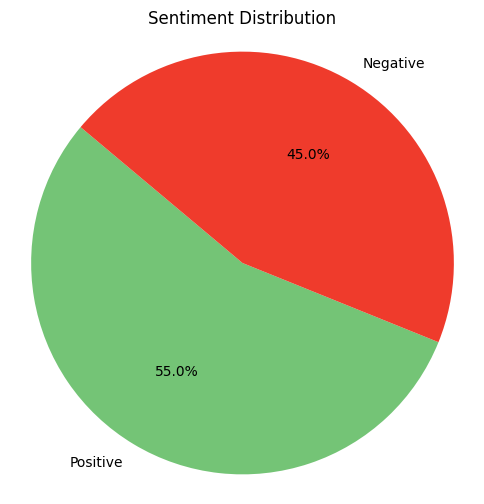

In [7]:
#visualize the sentiment column
# Count the sentiments
sentiment_counts = guardian_news["sentiment"].value_counts()

# Define colors 
colors = ['#74c476', '#ef3b2c']  # Green for Positive, Red for Negative

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=colors)
plt.title("Sentiment Distribution")
plt.axis('equal')
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


### Data Cleaning & Exploration

In [8]:
# check data structure
guardian_news.head()

,headline,published_date,category,summary,full_text,combined_text,polarity,sentiment
0,Harry Potter and the £4.50 chocolate frog | Al...,2017-12-12T06:00:26Z,Opinion,I was delighted when my son discovered JK Rowl...,It was the frog that pushed me over the edge. ...,Harry Potter and the £4.50 chocolate frog | Al...,0.433333,Positive
1,What if the interstellar body Oumuamua really ...,2017-12-13T11:30:01Z,Life and style,The long-running series in which readers answe...,"OK, so a mysterious, cigar-shaped, 400m-long o...",What if the interstellar body Oumuamua really ...,0.052778,Positive
2,How new moms are supported – or not – in Franc...,2017-12-16T10:00:02Z,US news,France offers full coverage for prenatal and p...,"In France, thanks to our social security syste...",How new moms are supported – or not – in Franc...,0.016477,Positive
3,"Wet docks, giant ducks and the zero-waste city...",2018-01-02T15:00:19Z,Art and design,"Windermere catches a wave, the V&amp;A unveils...","New Kettle’s Yard, Cambridge, by Jamie Fobert ...","Wet docks, giant ducks and the zero-waste city...",0.225000,Positive
4,Why medical students are practicing abortions ...,2017-12-22T12:00:00Z,US news,"Amid fears of a future abortion ban, a group t...",Cheyenne Mangold’s hands shook ever so slightl...,Why medical students are practicing abortions ...,0.000000,Negative


In [9]:
guardian_news.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   headline        200 non-null    object 
 1   published_date  200 non-null    object 
 2   category        200 non-null    object 
 3   summary         200 non-null    object 
 4   full_text       200 non-null    object 
 5   combined_text   200 non-null    object 
 6   polarity        200 non-null    float64
 7   sentiment       200 non-null    object 
dtypes: float64(1), object(7)
memory usage: 12.6+ KB


In [10]:
guardian_news.isnull().sum()

headline          0
published_date    0
category          0
summary           0
full_text         0
combined_text     0
polarity          0
sentiment         0
dtype: int64

In [11]:
guardian_news.duplicated().sum()

0

In [12]:
#check index and type
guardian_news['published_date'] = pd.to_datetime(guardian_news['published_date'])
guardian_news.head()

,headline,published_date,category,summary,full_text,combined_text,polarity,sentiment
0,Harry Potter and the £4.50 chocolate frog | Al...,2017-12-12 06:00:26+00:00,Opinion,I was delighted when my son discovered JK Rowl...,It was the frog that pushed me over the edge. ...,Harry Potter and the £4.50 chocolate frog | Al...,0.433333,Positive
1,What if the interstellar body Oumuamua really ...,2017-12-13 11:30:01+00:00,Life and style,The long-running series in which readers answe...,"OK, so a mysterious, cigar-shaped, 400m-long o...",What if the interstellar body Oumuamua really ...,0.052778,Positive
2,How new moms are supported – or not – in Franc...,2017-12-16 10:00:02+00:00,US news,France offers full coverage for prenatal and p...,"In France, thanks to our social security syste...",How new moms are supported – or not – in Franc...,0.016477,Positive
3,"Wet docks, giant ducks and the zero-waste city...",2018-01-02 15:00:19+00:00,Art and design,"Windermere catches a wave, the V&amp;A unveils...","New Kettle’s Yard, Cambridge, by Jamie Fobert ...","Wet docks, giant ducks and the zero-waste city...",0.225000,Positive
4,Why medical students are practicing abortions ...,2017-12-22 12:00:00+00:00,US news,"Amid fears of a future abortion ban, a group t...",Cheyenne Mangold’s hands shook ever so slightl...,Why medical students are practicing abortions ...,0.000000,Negative


In [13]:
guardian_news.columns 

Index(['headline', 'published_date', 'category', 'summary', 'full_text',
       'combined_text', 'polarity', 'sentiment'],
      dtype='object')

In [14]:
#subsetting relevant columns
guardian_news = guardian_news.loc[:, ['headline', 
                                      'summary', 
                                      'published_date', 
                                      'polarity', 
                                      'sentiment'
]]
guardian_news.head()

,headline,summary,published_date,polarity,sentiment
0,Harry Potter and the £4.50 chocolate frog | Al...,I was delighted when my son discovered JK Rowl...,2017-12-12 06:00:26+00:00,0.433333,Positive
1,What if the interstellar body Oumuamua really ...,The long-running series in which readers answe...,2017-12-13 11:30:01+00:00,0.052778,Positive
2,How new moms are supported – or not – in Franc...,France offers full coverage for prenatal and p...,2017-12-16 10:00:02+00:00,0.016477,Positive
3,"Wet docks, giant ducks and the zero-waste city...","Windermere catches a wave, the V&amp;A unveils...",2018-01-02 15:00:19+00:00,0.225000,Positive
4,Why medical students are practicing abortions ...,"Amid fears of a future abortion ban, a group t...",2017-12-22 12:00:00+00:00,0.000000,Negative


In [15]:
guardian_news.to_csv("guardian_news_data.csv", index=False)

### Analysis & Visualization


In [16]:
# 1. Get the length of headline and summary
guardian_news["headline_length"] = guardian_news["headline"].str.len()
guardian_news["summary_length"] = guardian_news["summary"].str.len()

# Make the random results reproducible
np.random.seed(42)

# simulate number of clicks
guardian_news["clicks"] = [
    np.random.randint(50, 150) if sentiment == "Positive" else np.random.randint(200, 350)
    for sentiment in guardian_news["sentiment"]
]

#simulate number of shares
guardian_news['shares'] = [
    np.random.randint(40, 120) if sentiment == 'Positive' else np.random.randint(150, 300)
    for sentiment in guardian_news["sentiment"]
] 

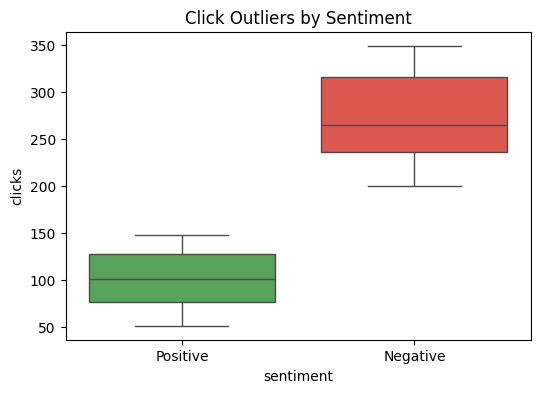

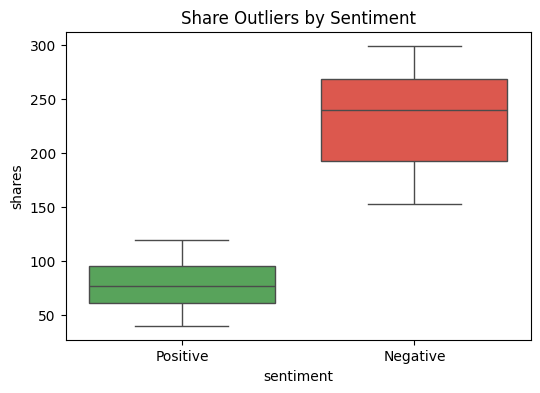

In [17]:
#Visualizing if there are outliers in the data
palette = {"Positive": "#4CAF50", "Negative": "#F44336"} 
# Boxplot for clicks
plt.figure(figsize=(6, 4))
sns.boxplot(x="sentiment", y="clicks", data=guardian_news, palette= palette, hue= 'sentiment',
           legend= False)
plt.title("Click Outliers by Sentiment")
plt.savefig('click_outliers_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

palette = {"Positive": "#4CAF50", "Negative": "#F44336"}
# Boxplot for shares
plt.figure(figsize=(6, 4))
sns.boxplot(x="sentiment", y="shares", data=guardian_news, palette= palette, hue= 'sentiment',
           legend= False)
plt.title("Share Outliers by Sentiment")
plt.savefig('share_outliers_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()


In [18]:
# Group by sentiment and calculate engagement groups
guardian_news_grouped = guardian_news.groupby("sentiment").agg({
    "headline_length": "mean",
    "summary_length": "mean",
    "clicks": "mean",
    "shares": "mean",
    "headline": "count"  # counts number of articles
}).rename(columns={"headline_length": "avg_headline_length",
                  "summary_length": "avg_summary_length",
                  "clicks": "avg_clicks",
                  "shares": "avg_shares",
                  "headline": "article_count"
})
guardian_news_grouped.round(2)

,avg_headline_length,avg_summary_length,avg_clicks,avg_shares,article_count
sentiment,,,,,
Negative,68.70,121.60,272.36,231.77,90
Positive,67.81,137.37,99.15,77.95,110


In [19]:
guardian_news_grouped.describe()

,avg_headline_length,avg_summary_length,avg_clicks,avg_shares,article_count
count,2.000000,2.000000,2.000000,2.000000,2.000000
mean,68.254545,129.486364,185.750505,154.856061,100.000000
std,0.629968,11.153002,122.478037,108.768022,14.142136
min,67.809091,121.600000,99.145455,77.945455,90.000000
25%,68.031818,125.543182,142.447980,116.400758,95.000000
50%,68.254545,129.486364,185.750505,154.856061,100.000000
75%,68.477273,133.429545,229.053030,193.311364,105.000000
max,68.700000,137.372727,272.355556,231.766667,110.000000


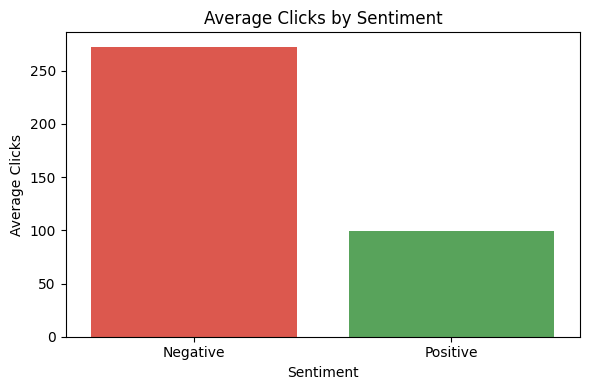

In [20]:

# Plot 1: Average Clicks by Sentiment
plt.figure(figsize=(6, 4))
palette = {"Positive": "#4CAF50", "Negative": "#F44336"} 
sns.barplot(x="sentiment", y="avg_clicks", data=guardian_news_grouped, palette=palette, 
            hue='sentiment', legend=False)
plt.title("Average Clicks by Sentiment")
plt.ylabel("Average Clicks")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.savefig('avg_clicks_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

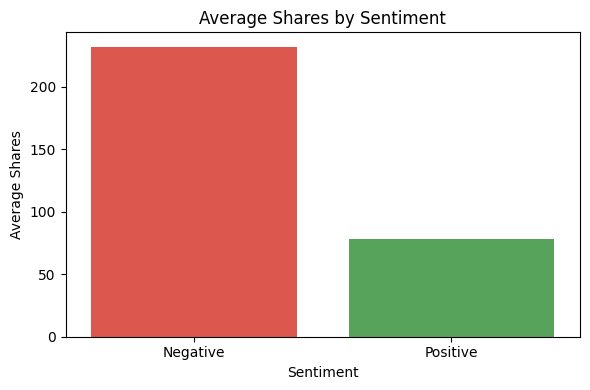

In [21]:
# Plot 2: Average Shares by Sentiment
plt.figure(figsize=(6, 4))
palette = {"Positive": "#4CAF50", "Negative": "#F44336"} 
sns.barplot(x="sentiment", y="avg_shares", data=guardian_news_grouped, 
            palette=palette, hue= 'sentiment', legend= False)
plt.title("Average Shares by Sentiment")
plt.ylabel("Average Shares")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.savefig('avg_shares_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

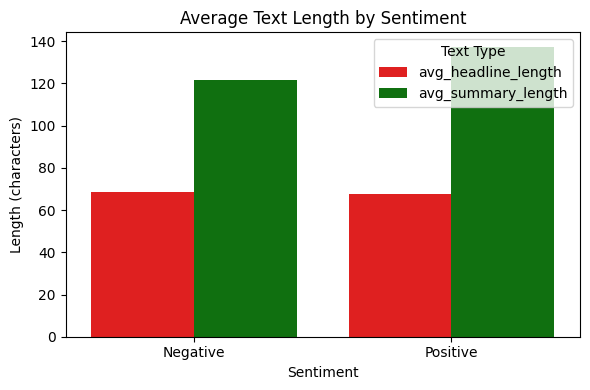

In [22]:
#Average Text Length by Sentiment
plt_data = guardian_news_grouped.reset_index()[["sentiment", "avg_headline_length", 
                                                "avg_summary_length"]]
plt_data = plt_data.melt(id_vars="sentiment", 
                           value_vars=["avg_headline_length", "avg_summary_length"],
                           var_name="Text Type", value_name="Average Length")
 

plt.figure(figsize=(6, 4))
sns.barplot(x="sentiment", y="Average Length", hue="Text Type", data=plt_data, 
            palette= ['red', 'green'])
plt.title("Average Text Length by Sentiment")
plt.ylabel("Length (characters)")
plt.xlabel("Sentiment")
plt.legend(title="Text Type")
plt.tight_layout()
plt.savefig('avg_text_length_by.png', dpi=300, bbox_inches='tight')
plt.show()


### A/B Test and Interpretation

T-statistic: -31.74
P-value: 1.7273534360784805e-69


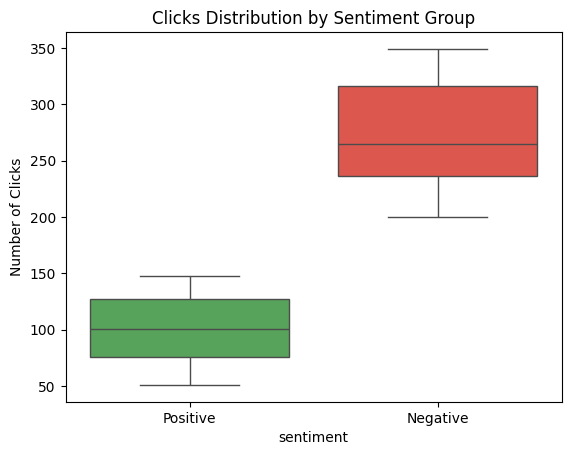

In [23]:
from scipy.stats import ttest_ind

# Split data into two groups
group_a = guardian_news[guardian_news["sentiment"] == "Positive"]
group_b = guardian_news[guardian_news["sentiment"] == "Negative"]

# A/B Test: Compare clicks between the two groups
t_stat, p_val = ttest_ind(group_a["clicks"], group_b["clicks"], equal_var=False)

print("T-statistic:", t_stat.round(2))
print("P-value:", p_val)

# Visualize clicks
palette = {"Positive": "#4CAF50", "Negative": "#F44336"} 
sns.boxplot(data=guardian_news, x="sentiment", y="clicks", hue= 'sentiment', palette= palette,
            legend= 'auto')
plt.title("Clicks Distribution by Sentiment Group")
plt.ylabel("Number of Clicks")
plt.savefig('click_distribution_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()


T-statistic (shares): -30.054188429500712
P-value (shares): 1.3279407099090667e-57


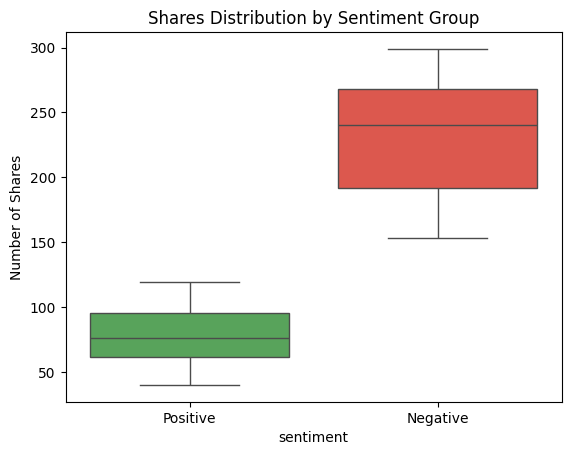

In [24]:
# A/B Test: Compare shares between the two groups
t_stat_shares, p_val_shares = ttest_ind(group_a["shares"], group_b["shares"], equal_var=False)

print("T-statistic (shares):", t_stat_shares)
print("P-value (shares):", p_val_shares)

# Visualize shares
palette = {"Positive": "#4CAF50", "Negative": "#F44336"} 
sns.boxplot(data=guardian_news, x="sentiment", y="shares", hue= 'sentiment',palette= palette,
            legend= 'auto')
plt.title("Shares Distribution by Sentiment Group")
plt.ylabel("Number of Shares")
plt.savefig('shares_distribution_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
pip install wordcloud

In [26]:
positive_text = ' '.join(guardian_news[guardian_news['sentiment'] == 'Positive']['headline']
                         .dropna()) + ' ' + \
                ' '.join(guardian_news[guardian_news['sentiment'] == 'Positive']['summary']
                         .dropna())

negative_text = ' '.join(guardian_news[guardian_news['sentiment'] == 'Negative']['headline']
                         .dropna()) + ' ' + \
                ' '.join(guardian_news[guardian_news['sentiment'] == 'Negative']['summary']
                         .dropna())

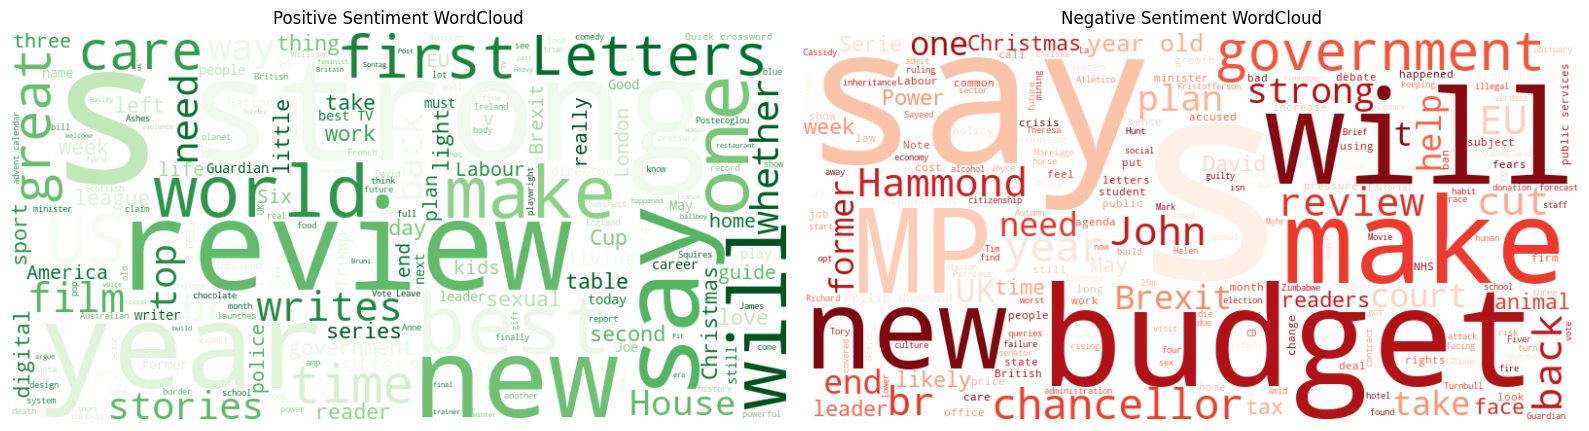

In [27]:
from wordcloud import WordCloud

# Positive WordCloud
positive_wc = WordCloud(
              width=800, height=400, background_color='white', colormap='Greens').generate(
                                                                                     positive_text)

# Negative WordCloud
negative_wc = WordCloud(
    width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Display side by side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment WordCloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment WordCloud')

plt.tight_layout()
plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()


### Outlier Observation

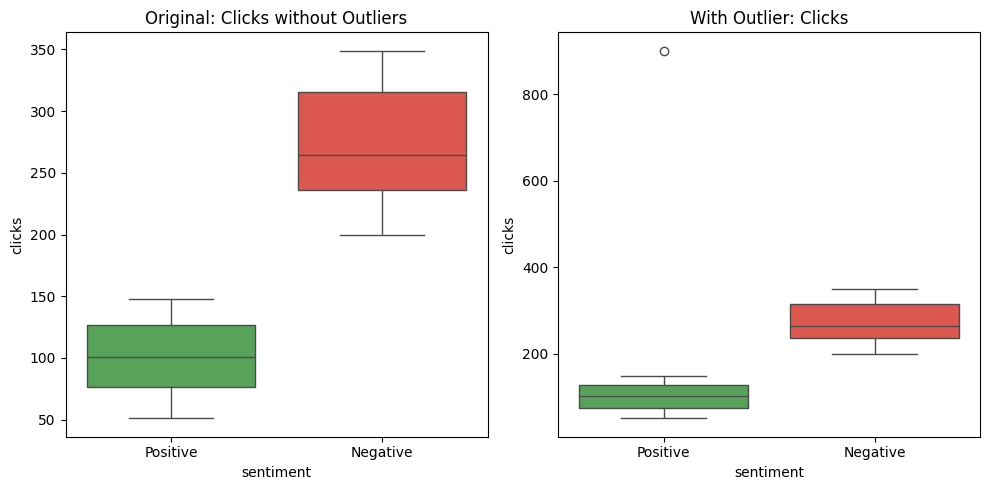

In [28]:
guardian_outlier = guardian_news.copy()

# Inject outliers into clicks
guardian_outlier.loc[0, 'clicks'] = 900
guardian_outlier.loc[1, 'shares'] = 800

plt.figure(figsize=(10, 5))
palette = {"Positive": "#4CAF50", "Negative": "#F44336"} 

plt.subplot(1, 2, 1)
sns.boxplot(x='sentiment', y='clicks', data=guardian_news, hue= 'sentiment', palette= palette)
plt.title('Original: Clicks without Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x='sentiment', y='clicks', data=guardian_outlier, hue= 'sentiment', palette= palette)
plt.title('With Outlier: Clicks')

plt.tight_layout()
plt.savefig('outlier_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# Grouped means from original data (no outliers)
original_means = guardian_news.groupby("sentiment")[["clicks", "shares"]].mean().rename(
    columns={"clicks": "original_clicks_mean", "shares": "original_shares_mean"}
)

# Grouped means with outliers
outlier_means = guardian_outlier.groupby("sentiment")[["clicks", "shares"]].mean().rename(
    columns={"clicks": "outlier_clicks_mean", "shares": "outlier_shares_mean"}
)

comparison = pd.concat([original_means, outlier_means], axis=1).round(2)
comparison

,original_clicks_mean,original_shares_mean,outlier_clicks_mean,outlier_shares_mean
sentiment,,,,
Negative,272.36,231.77,272.36,231.77
Positive,99.15,77.95,106.41,84.57


### Project Summary and Insights

- For the full walkthrough of this project, please check this document

https://docs.google.com/document/d/1O2-k9V-x3NsBSVQObb5yCaSarpv-GFOIim_MpM6Ahk4/edit?usp=sharing

It contains:
 - Step by step break down of the analysis
 - Visualizations and Interpretations
 - Key Insights and Recommendations
